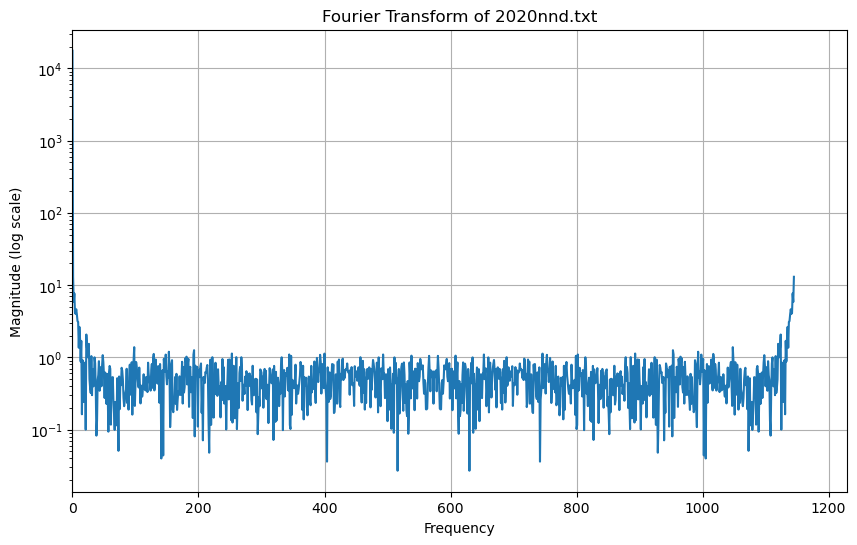

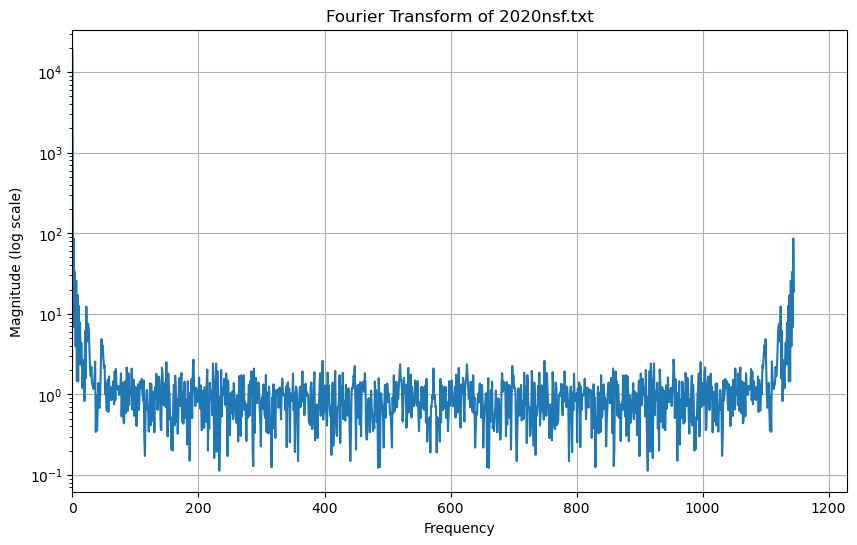

In [53]:
#sector 26
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector26\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

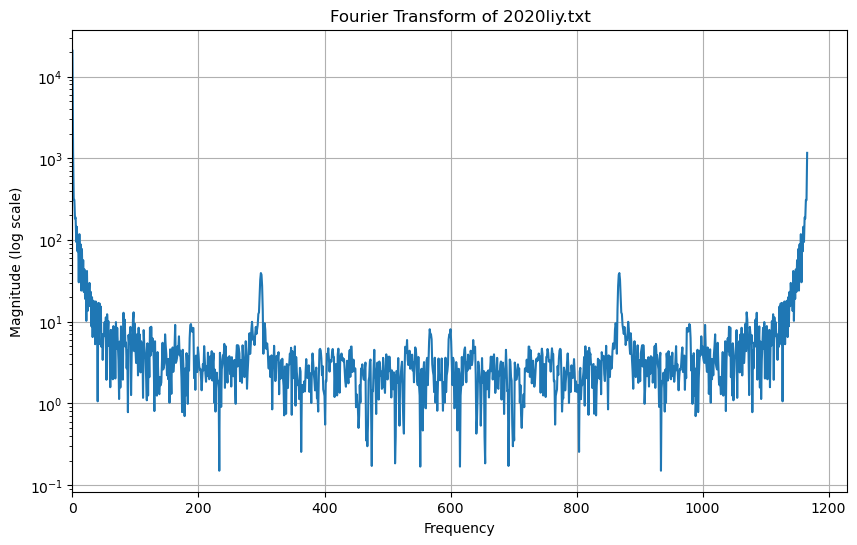

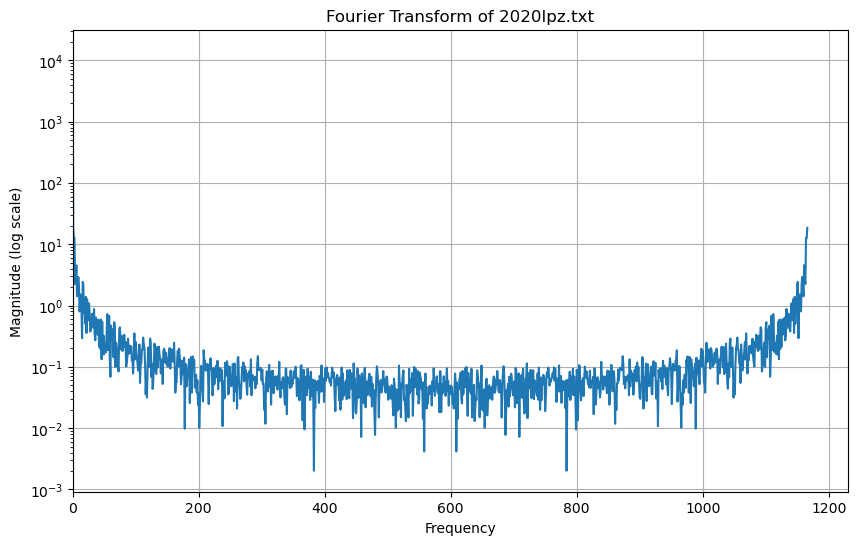

In [54]:
#sector 25
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector25\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

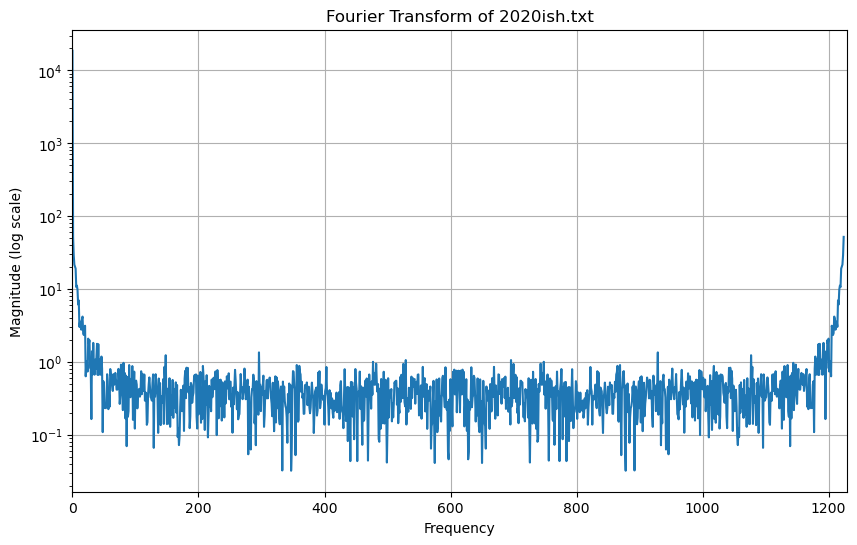

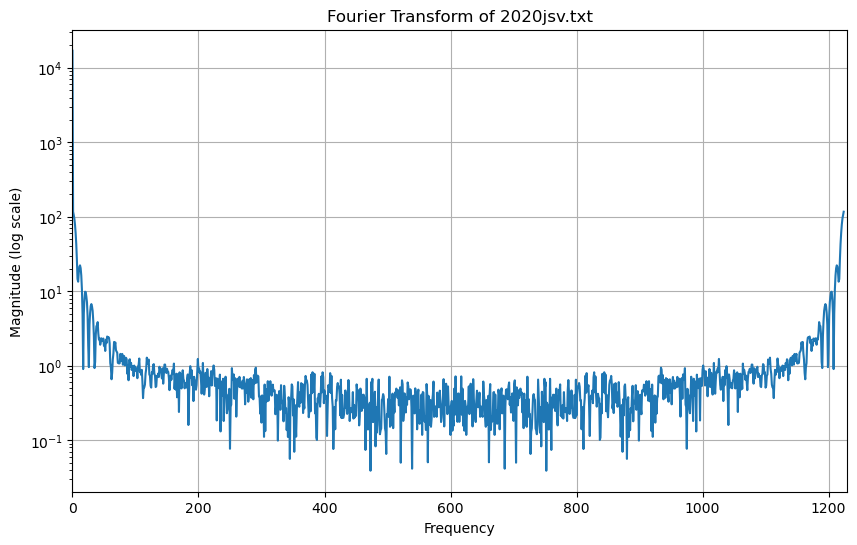

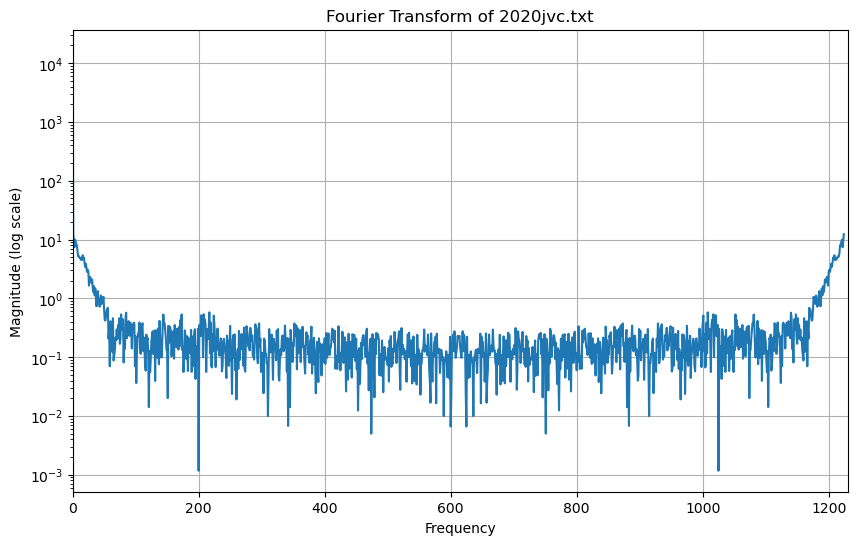

In [55]:
#sector 24
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector24\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

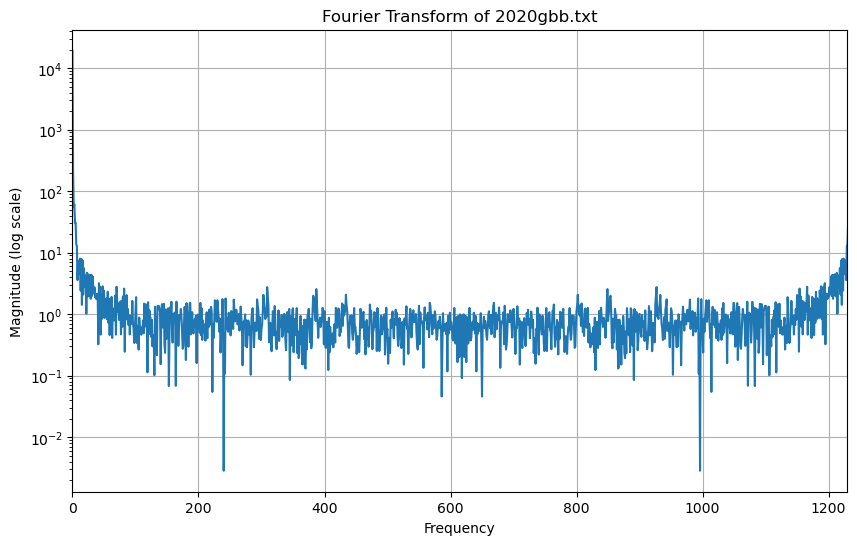

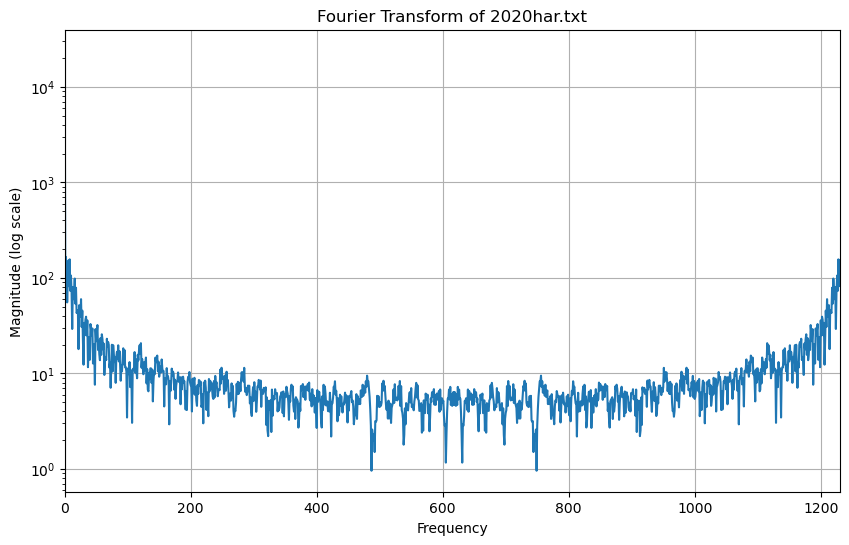

In [56]:
#sector 23
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector23\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

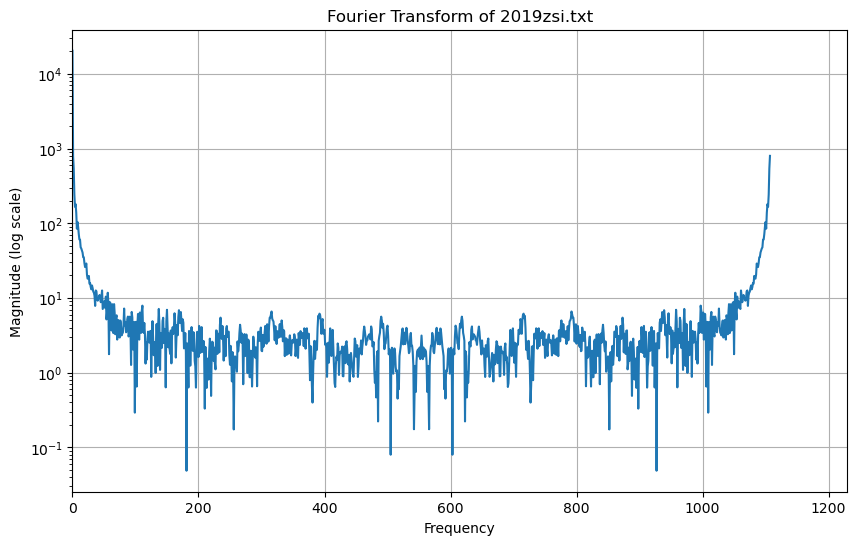

In [58]:
#sector 20
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector20\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

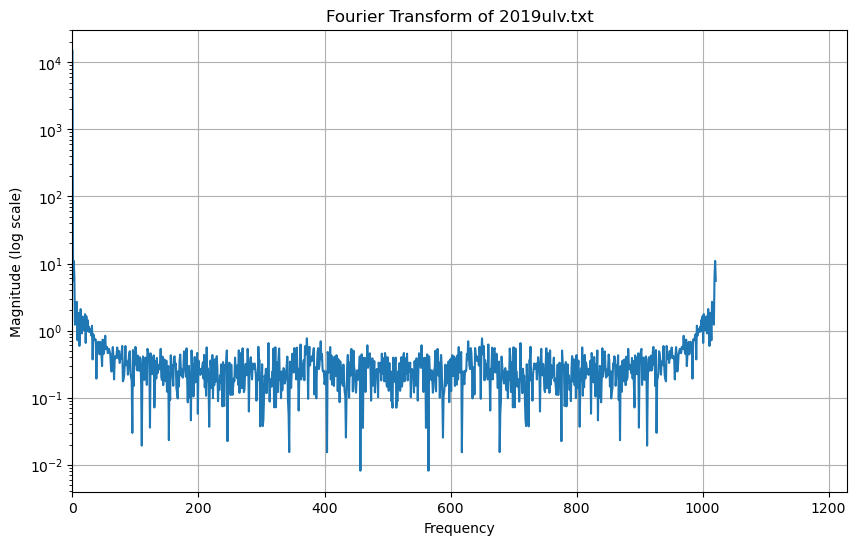

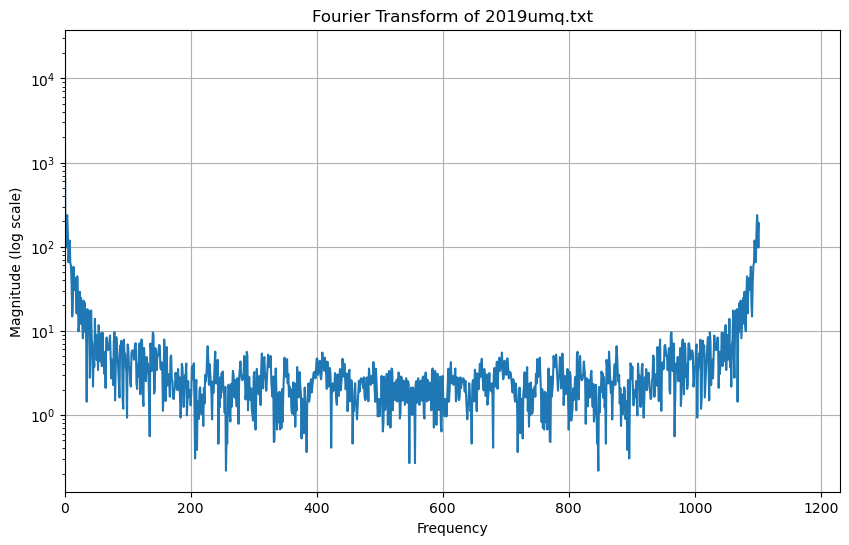

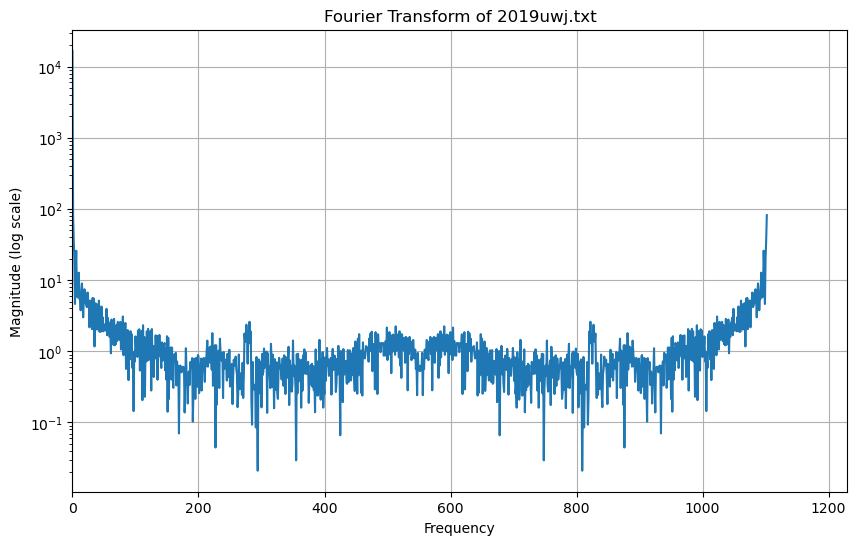

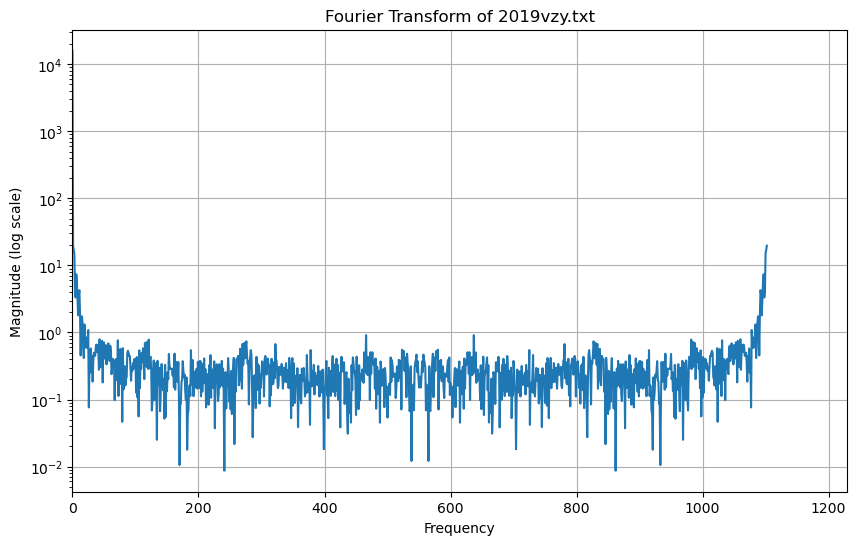

In [60]:
#sector 18
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector18\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

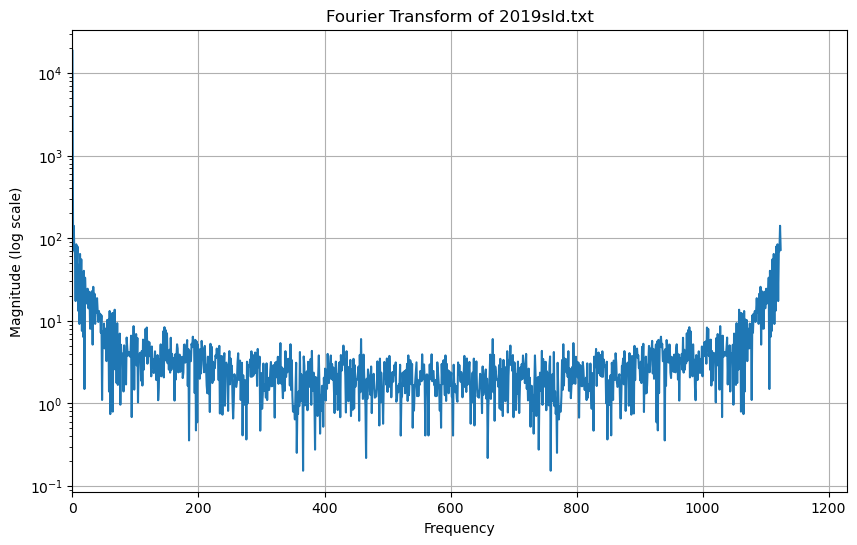

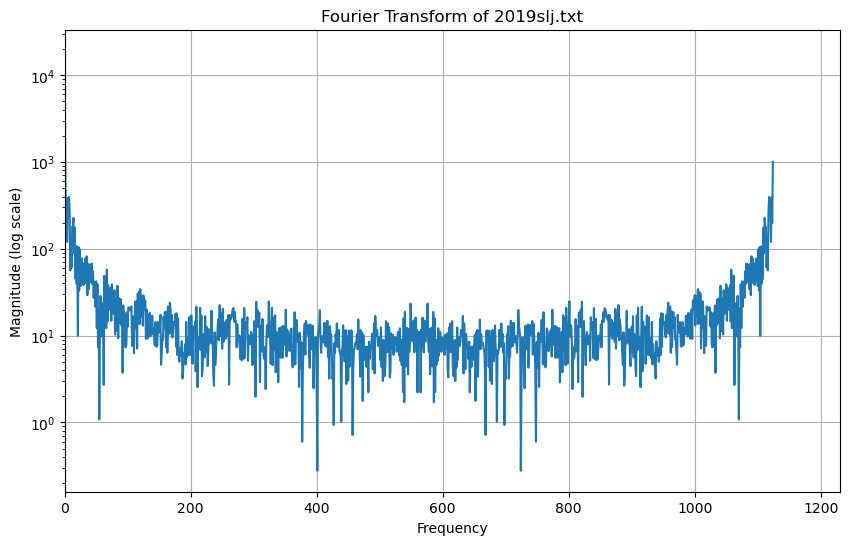

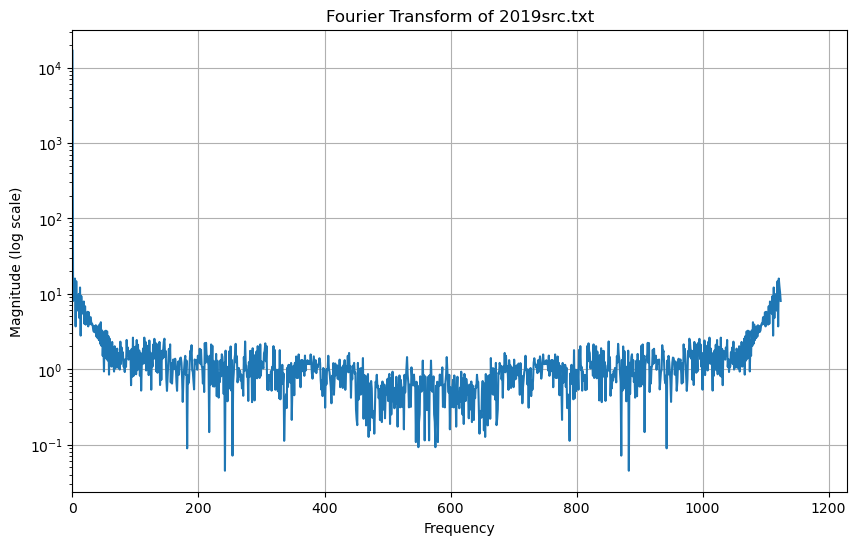

In [61]:
#sector 17
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector17\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

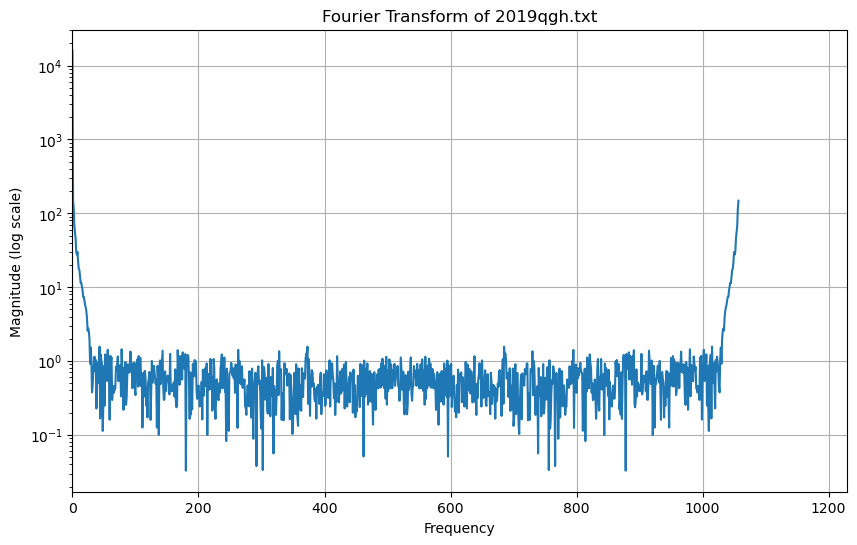

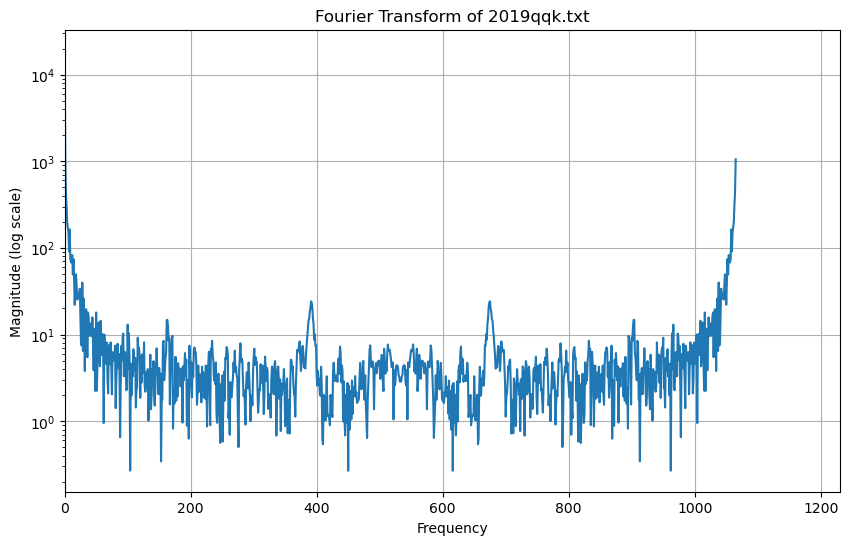

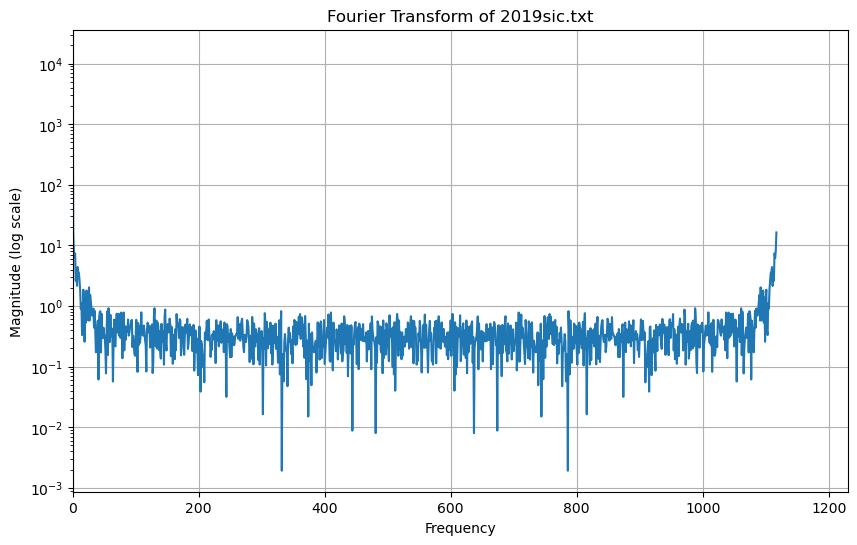

In [62]:
#sector 16
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector16\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

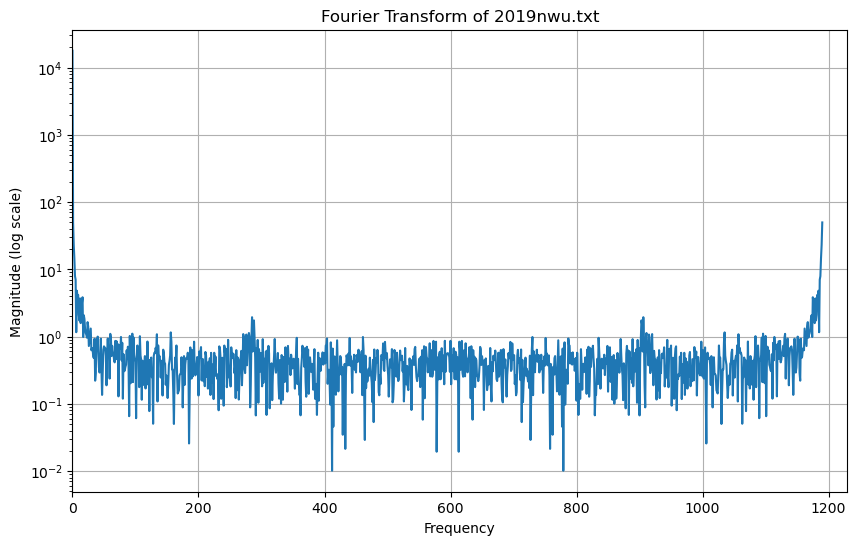

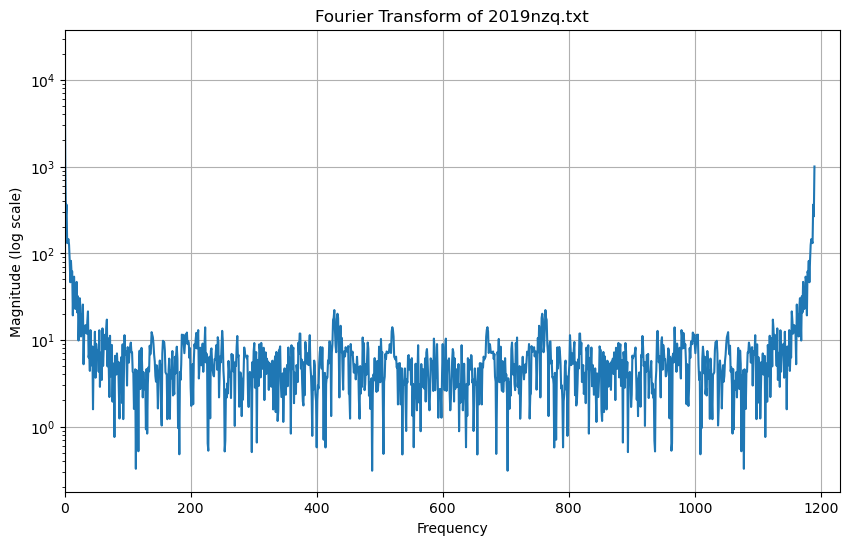

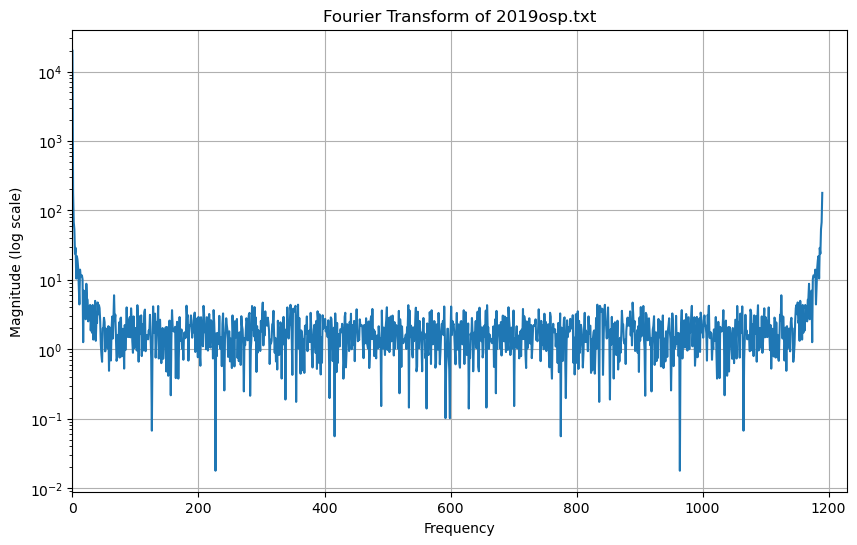

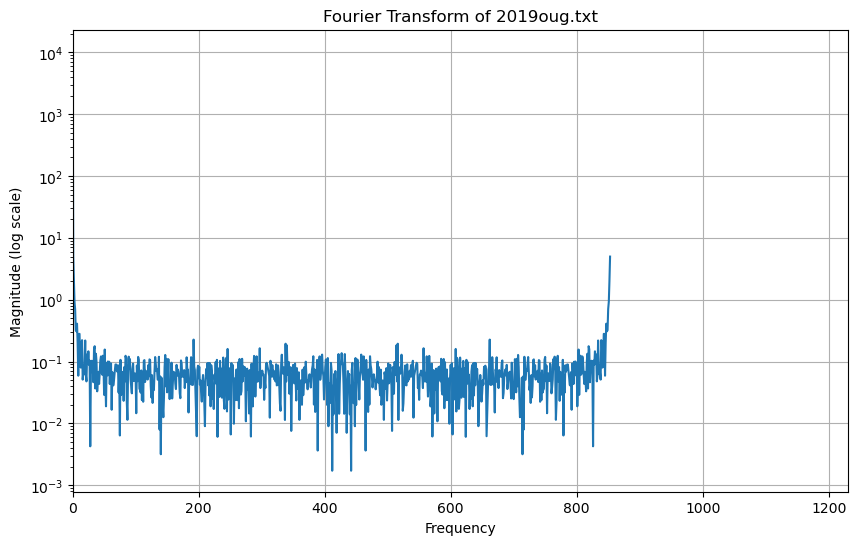

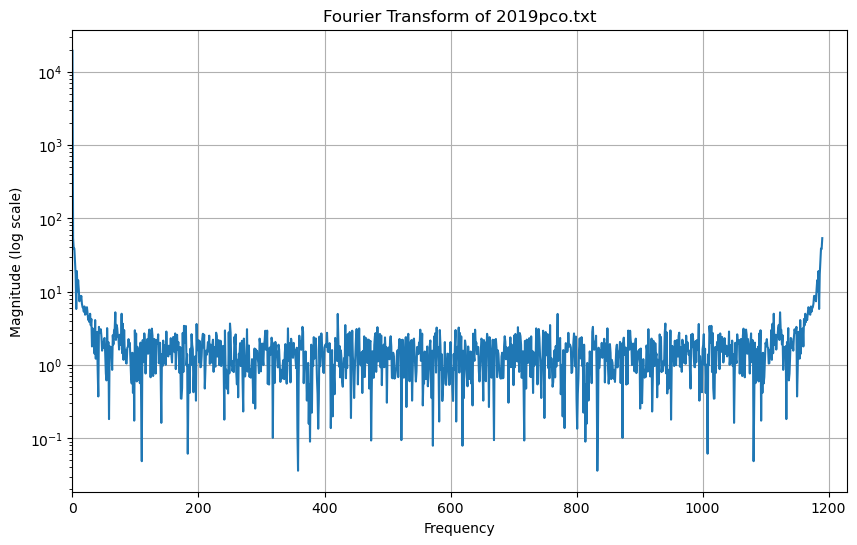

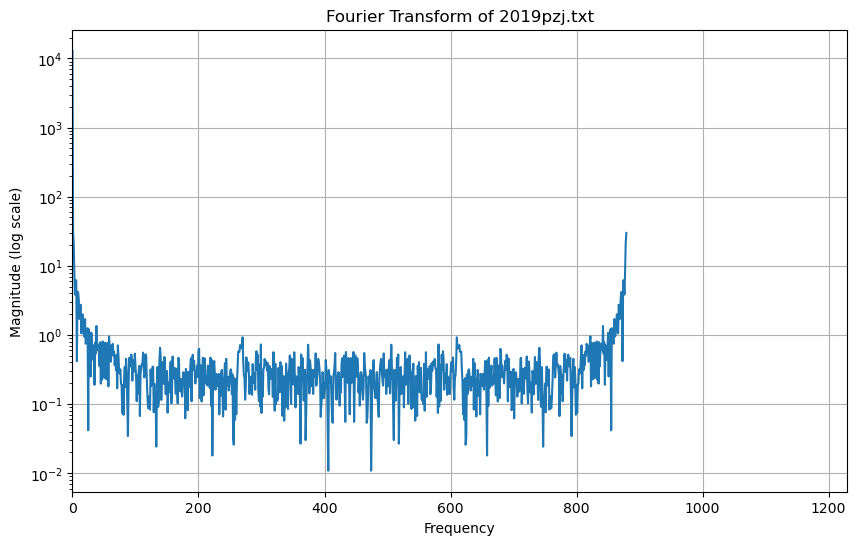

In [63]:
#sector 15
import numpy as np
import matplotlib.pyplot as plt
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector15\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

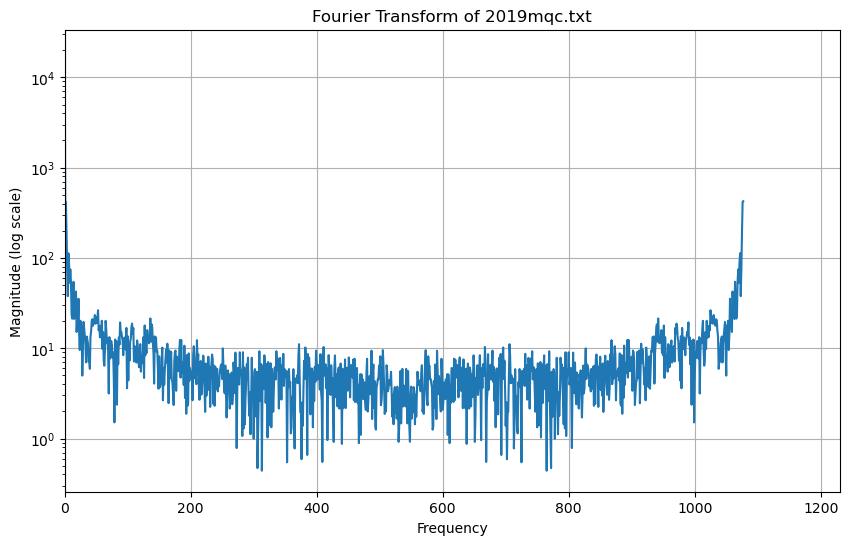

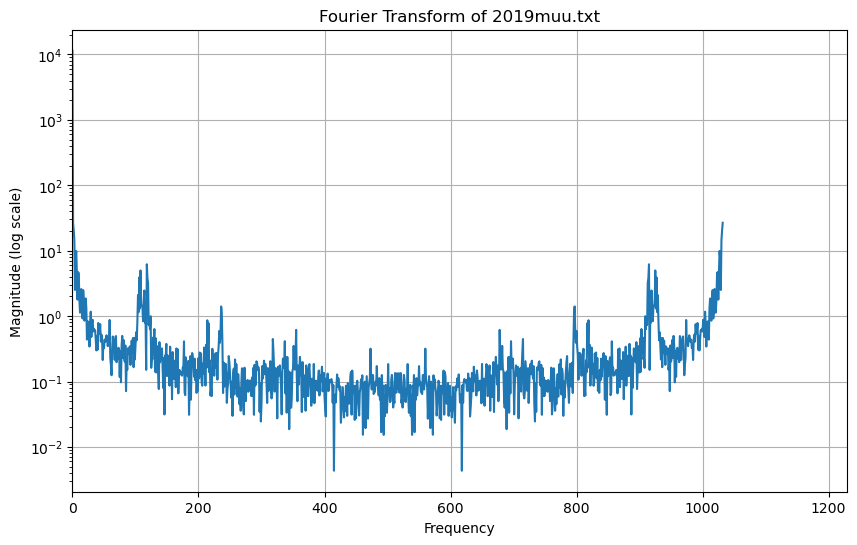

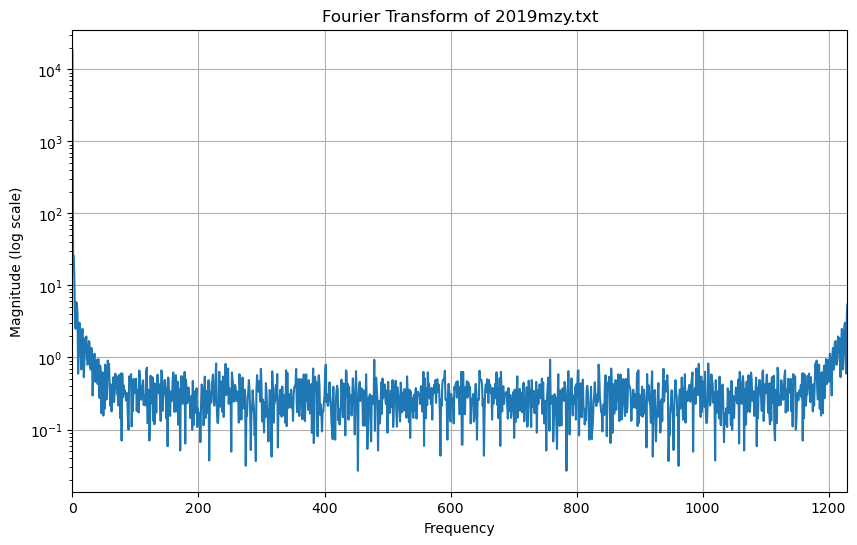

In [71]:
#sector 14
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector14\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

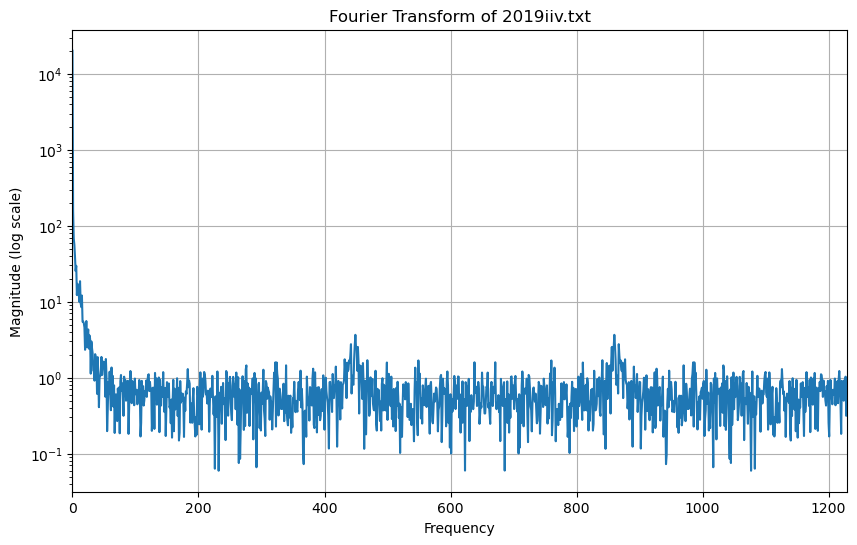

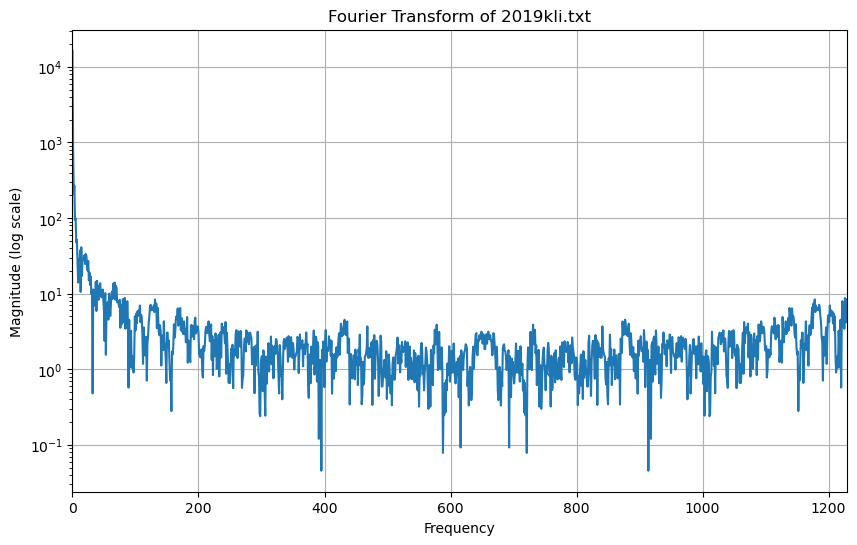

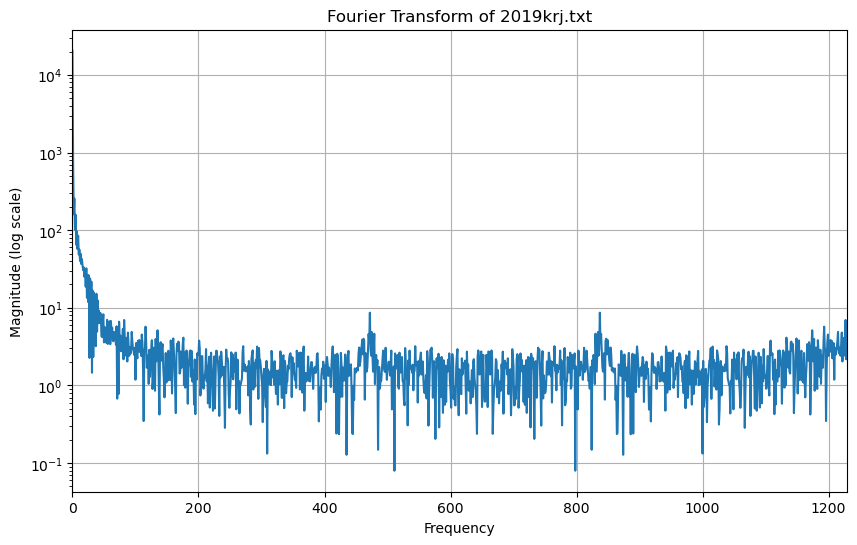

In [72]:
#sector 13
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector13\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

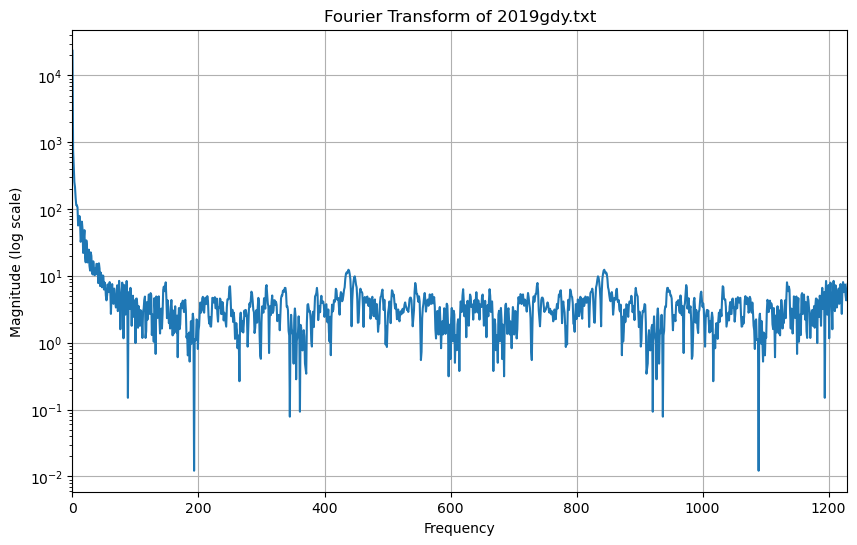

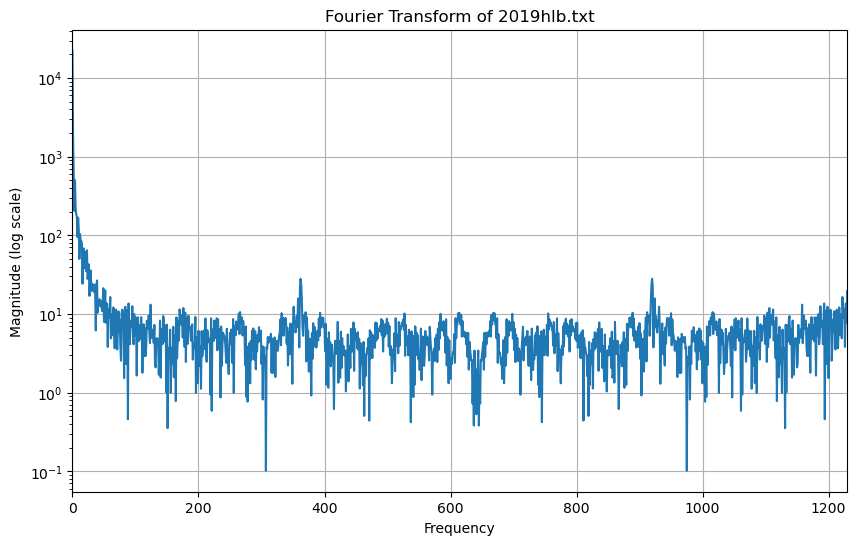

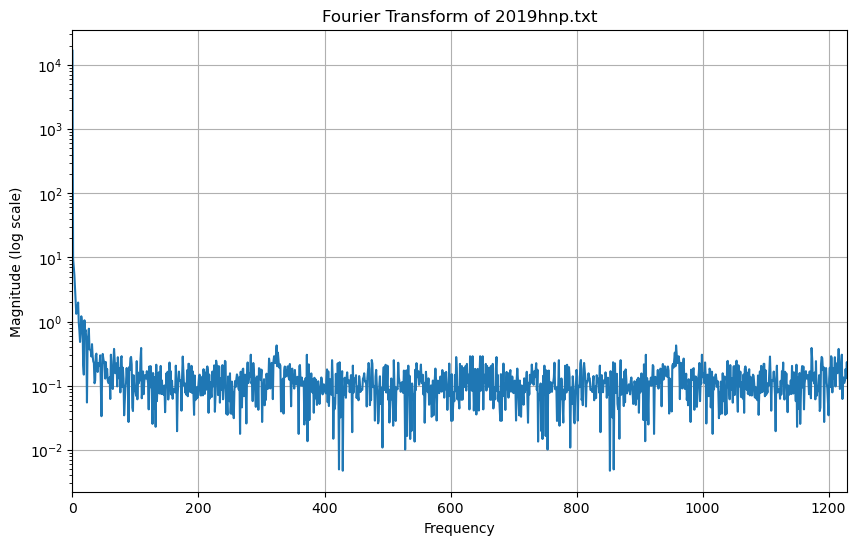

In [73]:
#sector 12
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector12\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

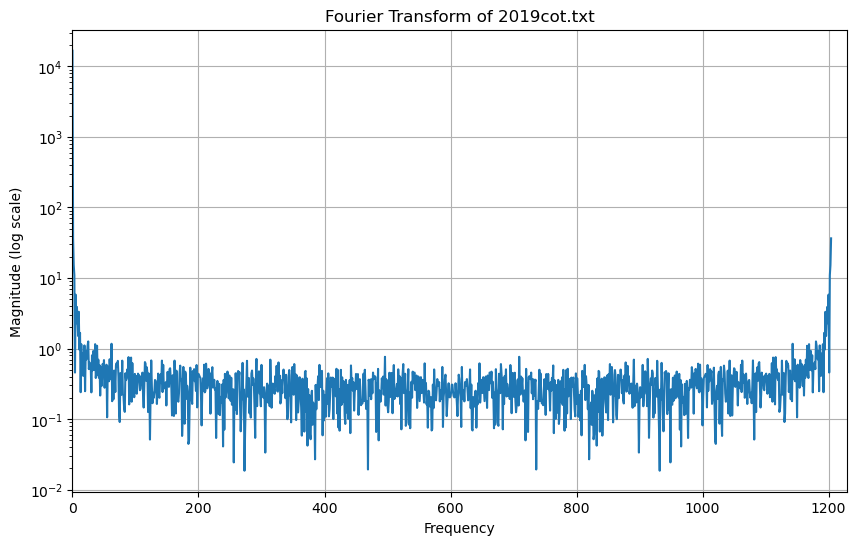

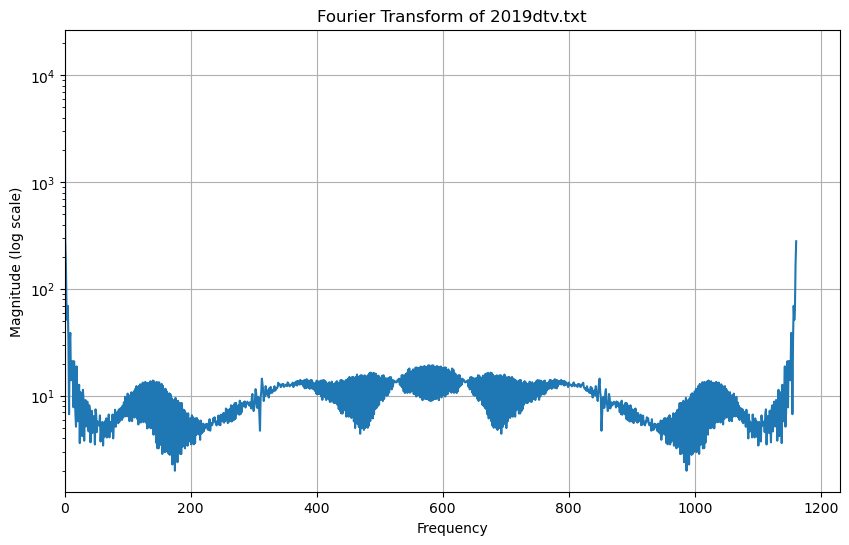

In [75]:
#sector 10
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector10\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

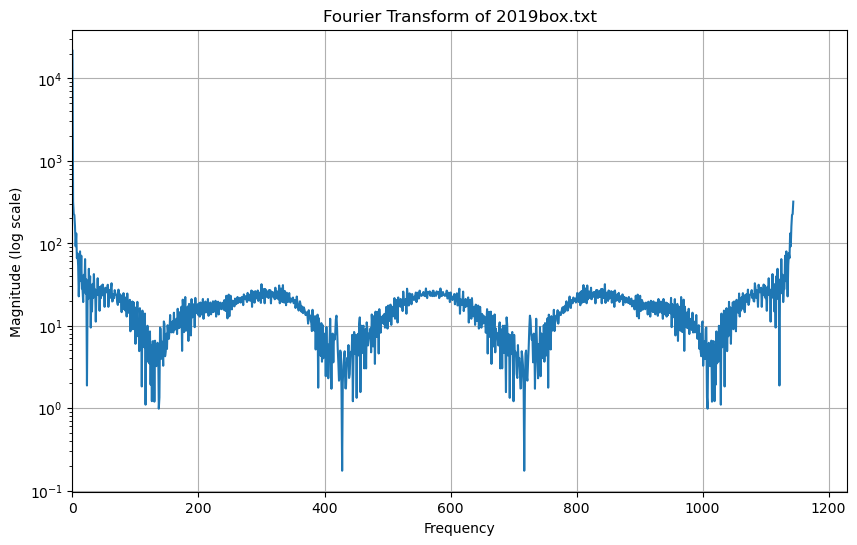

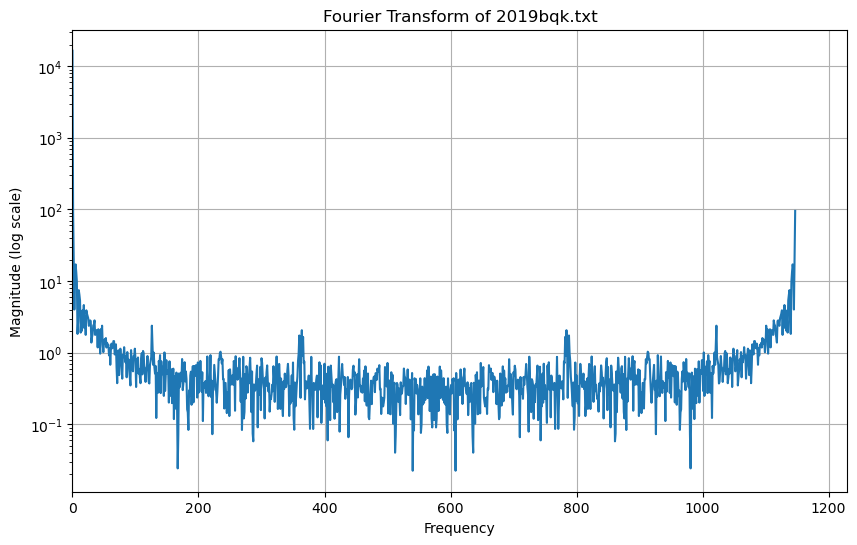

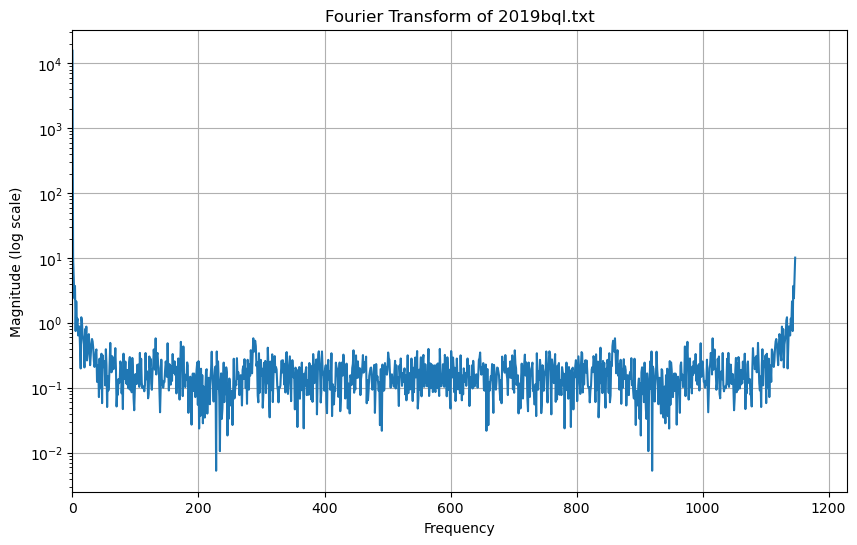

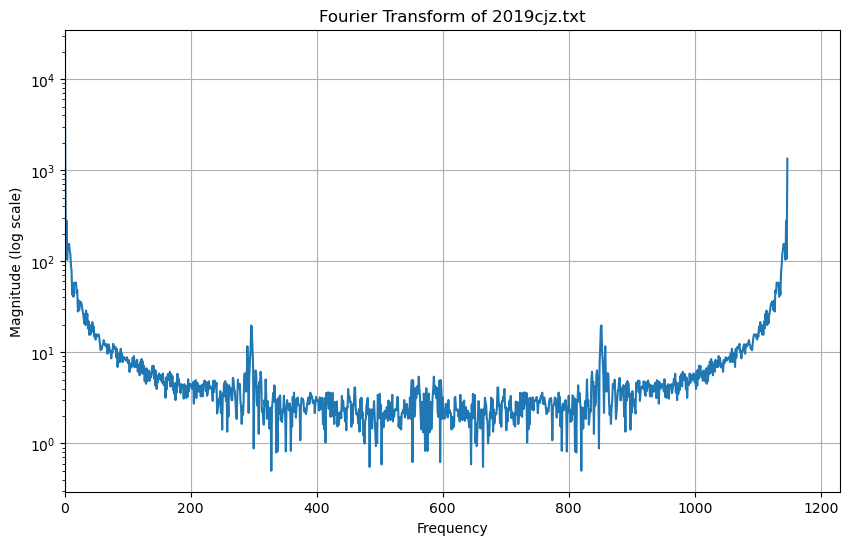

In [76]:
#sector 09
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector09\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

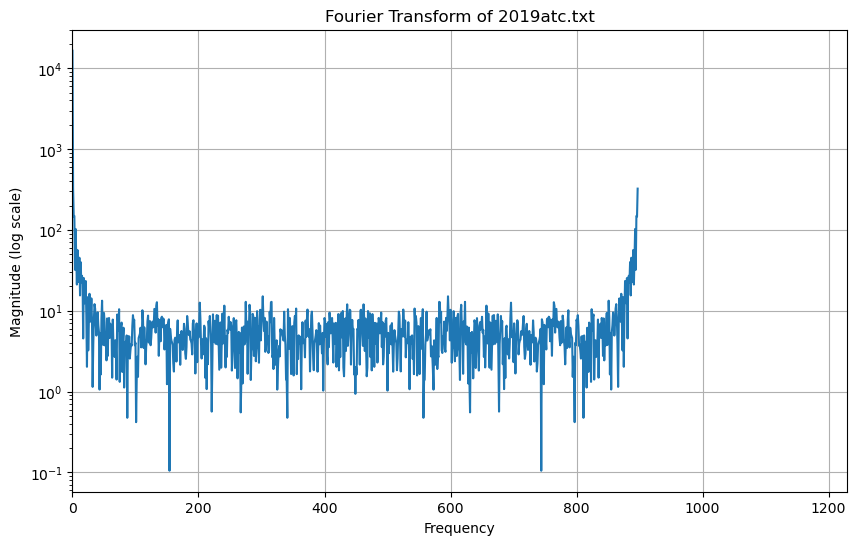

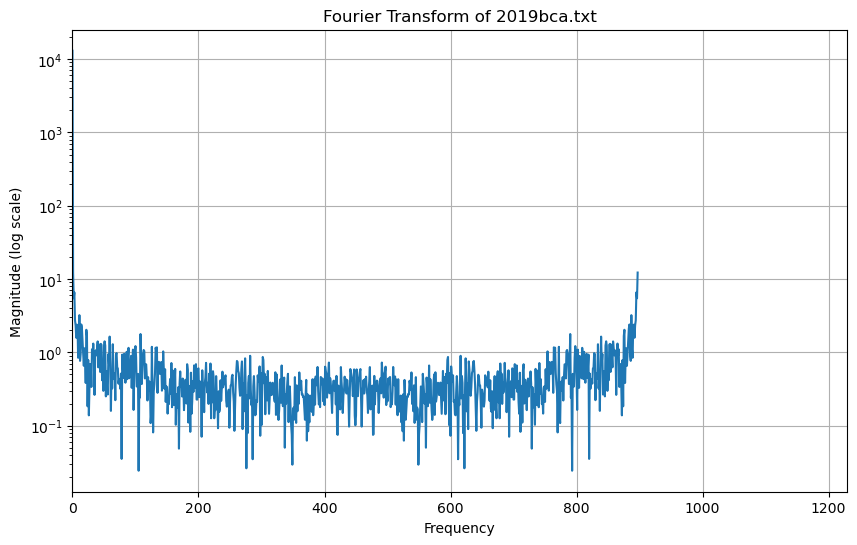

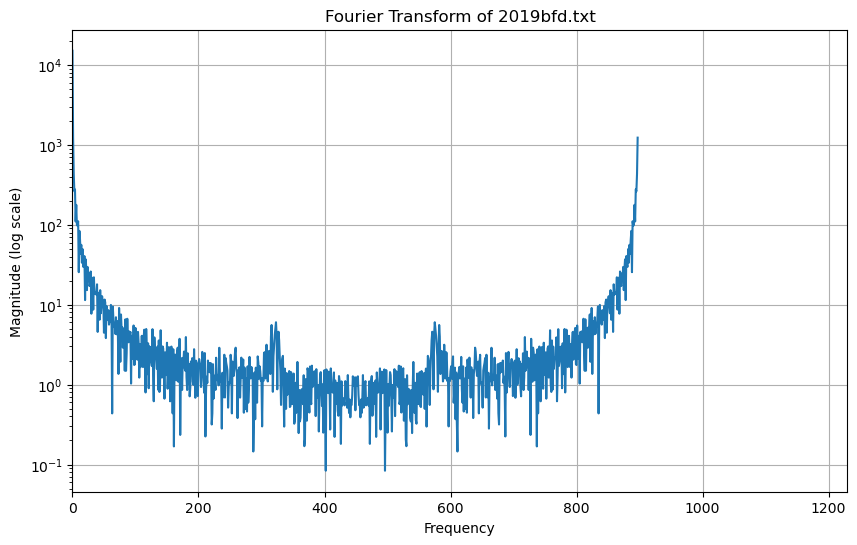

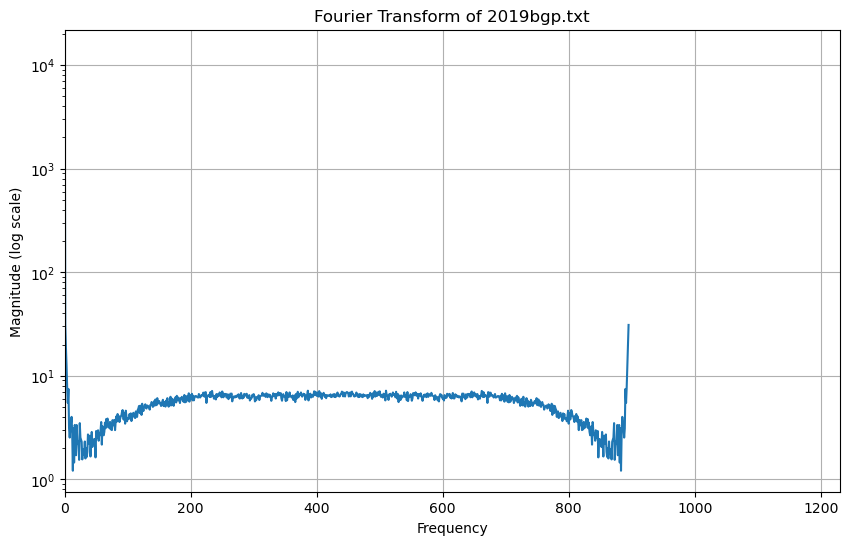

In [77]:
#sector 08
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector08\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()

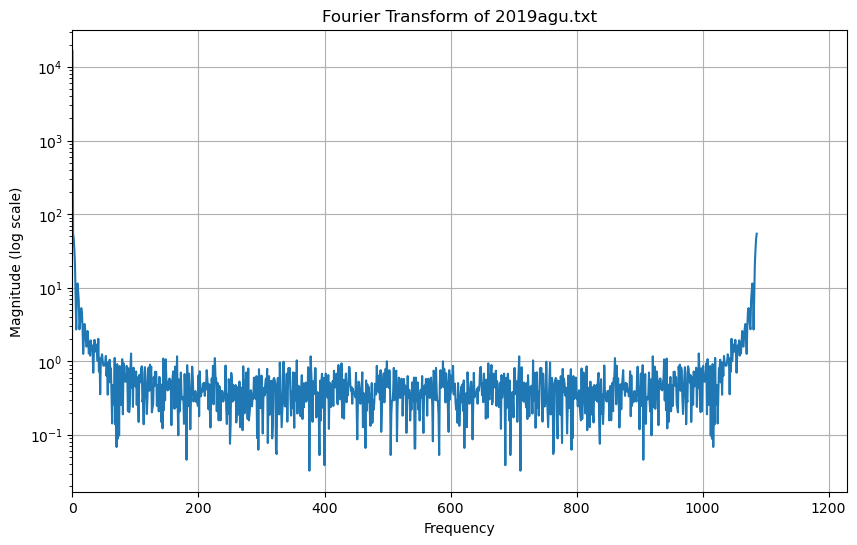

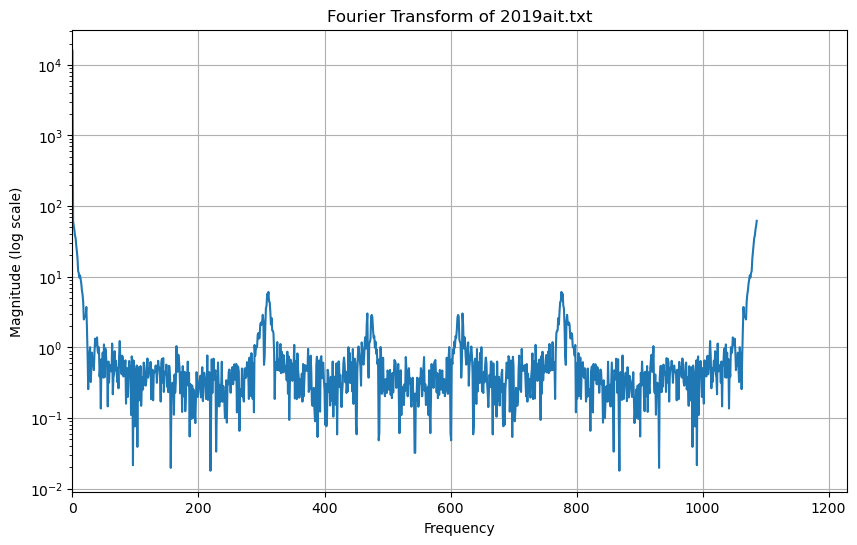

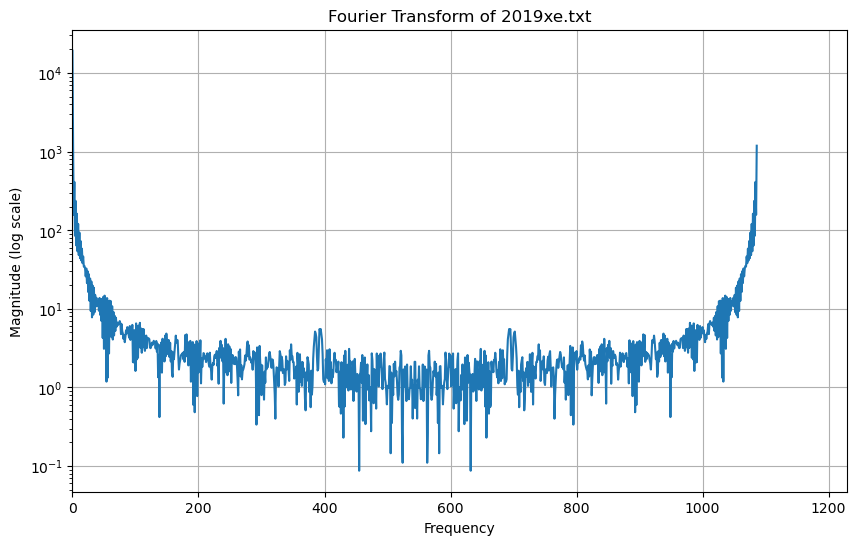

In [78]:
#sector 07
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os


data_dir = r'C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector07\Super Outbursts'
files = os.listdir(data_dir)
for file_name in files:
    
    if file_name.endswith('.txt'):
        
        file_path = os.path.join(data_dir, file_name)
        data = np.loadtxt(file_path)
        time = data[:, 1]
        flux = data[:, 4]
        
        flux_fft = np.fft.fft(flux)
        freq = np.fft.fftfreq(len(flux))

        plt.figure(figsize=(10, 6))
        plt.plot(np.abs(flux_fft))
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude (log scale)')
        plt.title('Fourier Transform of ' + file_name)
        plt.grid(True)
        plt.yscale('log')
        plt.xlim(0,1230)
        plt.show()